<a href="https://colab.research.google.com/github/DJCordhose/ux-by-tfjs/blob/master/notebooks/rnn-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training on Mouse-Movements on the Server

In [1]:
# !pip install -q tf-nightly-gpu-2.0-preview

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [3]:
# a small sanity check, does tf seem to work ok?
hello = tf.constant('Hello TF!')
print("This works: {}".format(hello))

This works: b'Hello TF!'


In [4]:
# this should return True even on Colab
tf.test.is_gpu_available()

True

In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
tf.executing_eagerly()

True

## load data

In [7]:
# !curl -O https://raw.githubusercontent.com/DJCordhose/deep-learning-crash-course-notebooks/master/data/insurance-customers-1500.csv

In [8]:
!ls -l ../data

total 616
-rw-r--r-- 1 olive 197609 627560 Mar 22 17:31 sample1.json


In [9]:
import pandas as pd
print(pd.__version__)

0.23.4


In [10]:
# pd.read_json?

In [11]:
df = pd.read_json('../data/sample1.json', typ='series')

In [12]:
len(df)

213

In [13]:
df.head()

0    {'x': [[813, 238, 0, -2], [813, 237, 0, -2], [...
1    {'x': [[732, 231, 8, -4], [737, 229, 10, -2], ...
2    {'x': [[674, 255, -54, 26], [655, 267, -38, 22...
3    {'x': [[715, 243, 6, -4], [717, 242, 4, -2], [...
4    {'x': [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0...
dtype: object

In [14]:
X = [item['x'] for item in df]

In [15]:
X

[[[813, 238, 0, -2],
  [813, 237, 0, -2],
  [813, 236, 0, -2],
  [813, 235, 0, -2],
  [814, 234, 2, -2],
  [815, 232, 2, -4],
  [816, 230, 2, -6],
  [818, 227, 4, -4],
  [818, 225, 0, -4],
  [819, 223, 2, -4],
  [819, 222, 0, -4],
  [820, 221, 2, 0],
  [812, 223, -16, 2],
  [803, 226, -18, 8],
  [787, 233, -32, 12],
  [763, 241, -48, 16],
  [753, 244, -20, 8],
  [742, 250, -22, 12],
  [722, 256, -40, 12],
  [704, 262, -36, 12],
  [694, 267, -20, 8],
  [683, 272, -22, 10],
  [670, 279, -26, 14],
  [657, 288, -26, 18],
  [650, 293, -14, 10]],
 [[732, 231, 8, -4],
  [737, 229, 10, -2],
  [741, 226, 8, -8],
  [746, 224, 10, -2],
  [749, 223, 6, -2],
  [752, 221, 6, -6],
  [757, 219, 10, -4],
  [760, 217, 6, -2],
  [762, 215, 4, -4],
  [765, 213, 6, -4],
  [768, 210, 6, -6],
  [771, 209, 6, -4],
  [773, 207, 4, -4],
  [774, 205, 2, -2],
  [777, 204, 6, -4],
  [779, 201, 4, -6],
  [782, 199, 6, -4],
  [785, 197, 6, -4],
  [787, 196, 4, -2],
  [789, 194, 4, -4],
  [792, 192, 6, -2],
  [793, 1

In [16]:
X[0]

[[813, 238, 0, -2],
 [813, 237, 0, -2],
 [813, 236, 0, -2],
 [813, 235, 0, -2],
 [814, 234, 2, -2],
 [815, 232, 2, -4],
 [816, 230, 2, -6],
 [818, 227, 4, -4],
 [818, 225, 0, -4],
 [819, 223, 2, -4],
 [819, 222, 0, -4],
 [820, 221, 2, 0],
 [812, 223, -16, 2],
 [803, 226, -18, 8],
 [787, 233, -32, 12],
 [763, 241, -48, 16],
 [753, 244, -20, 8],
 [742, 250, -22, 12],
 [722, 256, -40, 12],
 [704, 262, -36, 12],
 [694, 267, -20, 8],
 [683, 272, -22, 10],
 [670, 279, -26, 14],
 [657, 288, -26, 18],
 [650, 293, -14, 10]]

In [17]:
y = [item['y'] for item in df]

In [18]:
y[0]

1

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.models import Sequential, Model

In [20]:
n_steps = len(X[0])
n_features = len(X[0][0])
n_buttons = 4

# define model
model = Sequential()
model.add(GRU(units=50, activation='tanh', input_shape=(n_steps, n_features), name="RNN_Input"))
model.add(Dense(units=n_buttons, name='softmax', activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
%%time

EPOCHS = 200
BATCH_SIZE = 50

history = model.fit([X], y, 
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS, verbose=1, validation_split=0.2)

Train on 170 samples, validate on 43 samples
Epoch 1/200
170/170 [==============================] - 4s 22ms/sample - loss: 1.4518 - accuracy: 0.1882 - val_loss: 1.3889 - val_accuracy: 0.0233
Epoch 2/200
170/170 [==============================] - 0s 287us/sample - loss: 1.3639 - accuracy: 0.1824 - val_loss: 1.3916 - val_accuracy: 0.0930
Epoch 3/200
170/170 [==============================] - 0s 299us/sample - loss: 1.3134 - accuracy: 0.3706 - val_loss: 1.4183 - val_accuracy: 0.0698
Epoch 4/200
170/170 [==============================] - 0s 305us/sample - loss: 1.2659 - accuracy: 0.4647 - val_loss: 1.4442 - val_accuracy: 0.1628
Epoch 5/200
170/170 [==============================] - 0s 276us/sample - loss: 1.2246 - accuracy: 0.4882 - val_loss: 1.4728 - val_accuracy: 0.1628
Epoch 6/200
170/170 [==============================] - 0s 258us/sample - loss: 1.1964 - accuracy: 0.4529 - val_loss: 1.5081 - val_accuracy: 0.0465
Epoch 7/200
170/170 [==============================] - 0s 246us/sample - l

170/170 [==============================] - 0s 223us/sample - loss: 0.8395 - accuracy: 0.7647 - val_loss: 1.0355 - val_accuracy: 0.7209
Epoch 57/200
170/170 [==============================] - 0s 211us/sample - loss: 0.8316 - accuracy: 0.7765 - val_loss: 1.0305 - val_accuracy: 0.7442
Epoch 58/200
170/170 [==============================] - 0s 241us/sample - loss: 0.8256 - accuracy: 0.7706 - val_loss: 1.0209 - val_accuracy: 0.7442
Epoch 59/200
170/170 [==============================] - 0s 252us/sample - loss: 0.8214 - accuracy: 0.7882 - val_loss: 1.0096 - val_accuracy: 0.8605
Epoch 60/200
170/170 [==============================] - 0s 287us/sample - loss: 0.8148 - accuracy: 0.7882 - val_loss: 1.0044 - val_accuracy: 0.8372
Epoch 61/200
170/170 [==============================] - 0s 264us/sample - loss: 0.8072 - accuracy: 0.7882 - val_loss: 0.9978 - val_accuracy: 0.8140
Epoch 62/200
170/170 [==============================] - 0s 270us/sample - loss: 0.8010 - accuracy: 0.7941 - val_loss: 0.9845 

170/170 [==============================] - 0s 246us/sample - loss: 0.5391 - accuracy: 0.8765 - val_loss: 0.7174 - val_accuracy: 0.8140
Epoch 112/200
170/170 [==============================] - 0s 252us/sample - loss: 0.5350 - accuracy: 0.8882 - val_loss: 0.7434 - val_accuracy: 0.7907
Epoch 113/200
170/170 [==============================] - 0s 276us/sample - loss: 0.5285 - accuracy: 0.8941 - val_loss: 0.7185 - val_accuracy: 0.7907
Epoch 114/200
170/170 [==============================] - 0s 270us/sample - loss: 0.5316 - accuracy: 0.8941 - val_loss: 0.7127 - val_accuracy: 0.8140
Epoch 115/200
170/170 [==============================] - 0s 235us/sample - loss: 0.5231 - accuracy: 0.8941 - val_loss: 0.7285 - val_accuracy: 0.8140
Epoch 116/200
170/170 [==============================] - 0s 241us/sample - loss: 0.5222 - accuracy: 0.8941 - val_loss: 0.6700 - val_accuracy: 0.8605
Epoch 117/200
170/170 [==============================] - 0s 229us/sample - loss: 0.5216 - accuracy: 0.8941 - val_loss: 0

170/170 [==============================] - 0s 235us/sample - loss: 0.3504 - accuracy: 0.9353 - val_loss: 0.4645 - val_accuracy: 0.9302
Epoch 167/200
170/170 [==============================] - 0s 235us/sample - loss: 0.3505 - accuracy: 0.9353 - val_loss: 0.4691 - val_accuracy: 0.9302
Epoch 168/200
170/170 [==============================] - 0s 229us/sample - loss: 0.3484 - accuracy: 0.9294 - val_loss: 0.4396 - val_accuracy: 0.9302
Epoch 169/200
170/170 [==============================] - 0s 241us/sample - loss: 0.3516 - accuracy: 0.9353 - val_loss: 0.4347 - val_accuracy: 0.9302
Epoch 170/200
170/170 [==============================] - 0s 258us/sample - loss: 0.3442 - accuracy: 0.9294 - val_loss: 0.4517 - val_accuracy: 0.9302
Epoch 171/200
170/170 [==============================] - 0s 229us/sample - loss: 0.3414 - accuracy: 0.9294 - val_loss: 0.4467 - val_accuracy: 0.9302
Epoch 172/200
170/170 [==============================] - 0s 235us/sample - loss: 0.3392 - accuracy: 0.9294 - val_loss: 0

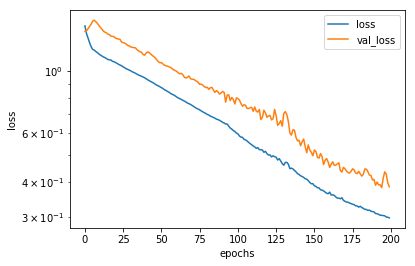

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.yscale('log')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['loss', 'val_loss'])

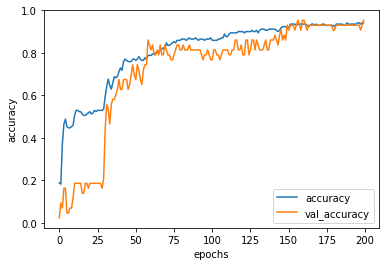

In [23]:
plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['accuracy', 'val_accuracy'])

In [24]:
model.predict([[X[0]]])

array([[0.10628445, 0.80424875, 0.08454707, 0.00491969]], dtype=float32)

In [25]:
model.predict([[X[0]]]).argmax()

1

In [26]:
y[0]

1

In [27]:
loss, accuracy = model.evaluate([X], y, batch_size=BATCH_SIZE)
accuracy

213/213 [==============================] - 0s 140us/sample - loss: 0.3124 - accuracy: 0.9437


0.943662

In [28]:
model.save('ux.hd5')